## Customer Churn Prediction for SyriaTel: A Machine Learning Approach to Enhance Retention Strategies.

## Business understanding


Customer churn is a major challenge for companies in the telecommunications industry, including SyriaTel. The objective is to develop a predictive model that can determine whether a customer is likely to terminate their services. This binary classification task focuses on identifying patterns in customer behavior and demographic data that may signal a risk of churn. The ultimate goal is to help SyriaTel mitigate the financial impact of churn by enabling proactive retention strategies.

## Problem statement

SyriaTel is confronted with the challenge of retaining customers in a highly competitive telecommunications market. Customer churn results in revenue loss and negatively impacts the company’s reputation and market position. The goal is to create a predictive model that can accurately identify customers at risk of churning, allowing SyriaTel to take proactive steps with targeted retention strategies.

## Objectives

The goal is to develop the most effective model for predicting customer churn at SyriaTel, with the aim of minimizing the financial impact of churn through the implementation of targeted retention strategies.

## Data source


The data is sourced from https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset

## Data loading

This step is to help us understand our data for more detailed modeling and visualizations.

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df = pd.read_csv('SyriaTel Customer Churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [207]:
categorical_columns = df.select_dtypes(exclude='number')
categorical_columns.columns

Index(['state', 'phone number', 'international plan', 'voice mail plan',
       'churn'],
      dtype='object')

In [208]:
numeric_columns = df.select_dtypes(include='number')
numeric_columns.columns

Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')

# Data cleaning

## Checking for missing values

In [209]:
# Check for missing values
missing_values = df.isnull().sum()
print( missing_values)

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


The data has no missing values

## Checking for duplicate values

In [210]:
# Check for duplicate rows
duplicates = df[df.duplicated()]

# Display the number of duplicate rows
print(f"Number of duplicate rows: {duplicates.shape[0]}")

# Display the duplicate rows, if any
if not duplicates.empty:
    print("duplicate rows:")
    print(duplicates)
else:
    print("No duplicate rows found.")

Number of duplicate rows: 0
No duplicate rows found.


The data has no duplicates

In [211]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## Dropping unimportant data

In [238]:
# Drop the 'phone number' column from the dataset
data = df.drop(columns=['phone number'])

# Verify that the column has been removed
data.head()


,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,0.524793,0.068627,no,yes,0.490196,0.755701,0.666667,0.755701,0.542755,0.582353,0.542866,0.595750,0.408451,0.595935,0.500,0.15,0.500000,0.111111,0.0
1,OH,0.438017,0.068627,no,yes,0.509804,0.460661,0.745455,0.460597,0.537531,0.605882,0.537690,0.621840,0.492958,0.622236,0.685,0.15,0.685185,0.111111,0.0
2,NJ,0.561983,0.068627,no,no,0.000000,0.693843,0.690909,0.693830,0.333242,0.647059,0.333225,0.374933,0.500000,0.375374,0.610,0.25,0.609259,0.000000,0.0
3,OH,0.342975,0.000000,yes,no,0.000000,0.853478,0.430303,0.853454,0.170195,0.517647,0.170171,0.467187,0.394366,0.467424,0.330,0.35,0.329630,0.222222,0.0
4,OK,0.305785,0.068627,yes,no,0.000000,0.475200,0.684848,0.475184,0.407754,0.717647,0.407959,0.440290,0.619718,0.440526,0.505,0.15,0.505556,0.333333,0.0


## Identify numeric and categorical variables

In [212]:
# Identify numeric and categorical variables
numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Display the results
print("Numeric Variables:")
print(numeric_columns)

print("\nCategorical Variables:")
print(categorical_columns)

Numeric Variables:
Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')

Categorical Variables:
Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')


In [213]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [214]:
# Check the count of each unique value in the 'Churn' column
if 'churn' in df.columns:
    churn_counts = df['churn'].value_counts()
    print("churn counts:")
    print(churn_counts)
else:
    print("The column 'churn' is not found in the dataset. Please check the column name.")

churn counts:
False    2850
True      483
Name: churn, dtype: int64


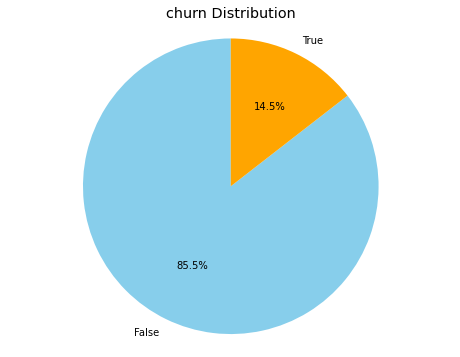

In [ ]:
# Check if the 'churn' column exists
if 'churn' in df.columns:
    # Calculate the churn counts
    churn_counts = df['churn'].value_counts()

    # Create a pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
    plt.title('churn Distribution')
    plt.axis('equal')  
    plt.show()
else:
    print("The column 'churn' is not found in the dataset. Please check the column name.")

In [239]:
# Summary statistics for numerical columns
summary_statistics = data.describe()

# Display the summary statistics
summary_statistics


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.413491,0.286102,0.158804,0.512472,0.608701,0.512446,0.552599,0.588908,0.552687,0.477870,0.472590,0.478143,0.511865,0.223972,0.511960,0.173651,0.144914
std,0.164554,0.415405,0.268399,0.155266,0.121631,0.155255,0.139439,0.117192,0.139459,0.136024,0.137807,0.136035,0.139592,0.123061,0.139588,0.146166,0.352067
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.301653,0.000000,0.000000,0.409635,0.527273,0.409624,0.458070,0.511765,0.458104,0.386767,0.380282,0.387328,0.425000,0.150000,0.425926,0.111111,0.000000
50%,0.413223,0.068627,0.000000,0.511403,0.612121,0.511402,0.553753,0.588235,0.553866,0.478752,0.471831,0.478781,0.515000,0.200000,0.514815,0.111111,0.000000
75%,0.520661,1.000000,0.392157,0.616876,0.690909,0.616868,0.646962,0.670588,0.647040,0.570468,0.563380,0.570831,0.605000,0.300000,0.605556,0.222222,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [240]:
# Convert 'international plan' and 'voice mail plan' to binary numerical values
data['international plan'] = data['international plan'].apply(lambda x: 1 if x == 'yes' else 0)
data['voice mail plan'] = data['voice mail plan'].apply(lambda x: 1 if x == 'yes' else 0)

# Encode 'state' using one-hot encoding or label encoding 
# One-hot encoding 
data = pd.get_dummies(data, columns=['state'], drop_first=True)

# Verify the changes
data.head()


,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,0.524793,0.068627,0,1,0.490196,0.755701,0.666667,0.755701,0.542755,0.582353,...,0,0,0,0,0,0,0,0,0,0
1,0.438017,0.068627,0,1,0.509804,0.460661,0.745455,0.460597,0.537531,0.605882,...,0,0,0,0,0,0,0,0,0,0
2,0.561983,0.068627,0,0,0.000000,0.693843,0.690909,0.693830,0.333242,0.647059,...,0,0,0,0,0,0,0,0,0,0
3,0.342975,0.000000,1,0,0.000000,0.853478,0.430303,0.853454,0.170195,0.517647,...,0,0,0,0,0,0,0,0,0,0
4,0.305785,0.068627,1,0,0.000000,0.475200,0.684848,0.475184,0.407754,0.717647,...,0,0,0,0,0,0,0,0,0,0


In [216]:
df.corr

<bound method DataFrame.corr of      state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                yes     

In [217]:

# Compute the correlation matrix for numeric variables
correlation_matrix = df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                        account length  area code  number vmail messages  \
account length                1.000000  -0.012463              -0.004628   
area code                    -0.012463   1.000000              -0.001994   
number vmail messages        -0.004628  -0.001994               1.000000   
total day minutes             0.006216  -0.008264               0.000778   
total day calls               0.038470  -0.009646              -0.009548   
total day charge              0.006214  -0.008264               0.000776   
total eve minutes            -0.006757   0.003580               0.017562   
total eve calls               0.019260  -0.011886              -0.005864   
total eve charge             -0.006745   0.003607               0.017578   
total night minutes          -0.008955  -0.005825               0.007681   
total night calls            -0.013176   0.016522               0.007123   
total night charge           -0.008960  -0.005845               0.00

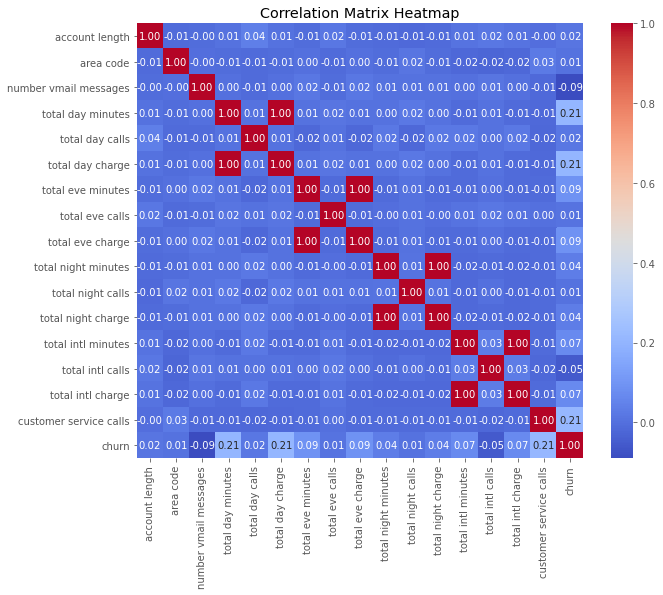

In [218]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [284]:
# drop the columns with high correlation
cols_drop = ['total day charge', 'total eve charge', 'total night charge', 'total intl charge']
df = df.drop(cols_drop, axis=1)
df.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,KS,0.524793,0.068627,382-4657,no,yes,0.490196,0.755701,0.666667,0.542755,0.582353,0.595750,0.408451,0.500,0.15,0.111111,0.0
1,OH,0.438017,0.068627,371-7191,no,yes,0.509804,0.460661,0.745455,0.537531,0.605882,0.621840,0.492958,0.685,0.15,0.111111,0.0
2,NJ,0.561983,0.068627,358-1921,no,no,0.000000,0.693843,0.690909,0.333242,0.647059,0.374933,0.500000,0.610,0.25,0.000000,0.0
3,OH,0.342975,0.000000,375-9999,yes,no,0.000000,0.853478,0.430303,0.170195,0.517647,0.467187,0.394366,0.330,0.35,0.222222,0.0
4,OK,0.305785,0.068627,330-6626,yes,no,0.000000,0.475200,0.684848,0.407754,0.717647,0.440290,0.619718,0.505,0.15,0.333333,0.0


In [219]:
#Converting churn to binary
df['churn'] = pd.DataFrame(df['churn'].map({False: 0, True: 1}))

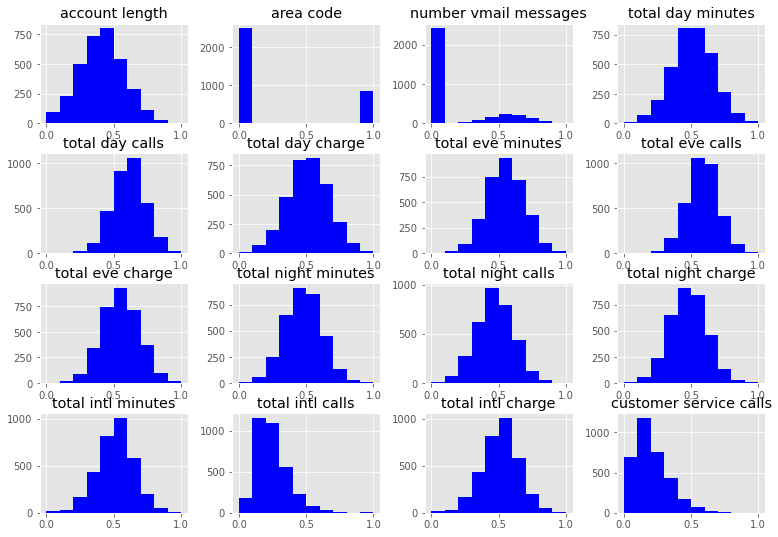

In [283]:
# Distribution of features excluding 'churn' column

df.drop(columns='churn').hist(figsize=(13,9), color='blue')
plt.show()


In [221]:
df.select_dtypes(include=['object']).columns


Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')

In [223]:
print(df.columns)

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


# Data splitting 
To start modeling we need to split our data features and target variable.

In [225]:
X = df.drop(columns=['churn'])  
y = df['churn'] 

In [226]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (2666, 20)
X_test shape: (667, 20)
y_train shape: (2666,)
y_test shape: (667,)


In [228]:
import numpy as np
from scipy.stats import zscore

# Calculate the Z-scores for each numeric column
numeric_columns = df.select_dtypes(include=np.number).columns
df[numeric_columns] = df[numeric_columns].apply(zscore)

# Set a threshold for outliers (commonly 3)
threshold = 3

# Remove rows where any Z-score is greater than the threshold or less than the negative threshold
df_cleaned = df[(df[numeric_columns].abs() <= threshold).all(axis=1)]

# Check the size of the DataFrame before and after removing outliers
print(f"Before removing outliers, data length: {len(df)}")
print(f"After removing outliers, data length: {len(df_cleaned)}")

# Optionally, inspect the first few rows of the cleaned data
df_cleaned.head()


Before removing outliers, data length: 3333
After removing outliers, data length: 3169


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,0.676489,-0.523603,382-4657,no,yes,1.234883,1.566767,0.476643,1.567036,...,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,-0.427932,-0.411672
1,OH,0.149065,-0.523603,371-7191,no,yes,1.307948,-0.333738,1.124503,-0.334013,...,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,-0.427932,-0.411672
2,NJ,0.902529,-0.523603,358-1921,no,no,-0.591760,1.168304,0.675985,1.168464,...,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,-1.188218,-0.411672
3,OH,-0.428590,-0.688834,375-9999,yes,no,-0.591760,2.196596,-1.466936,2.196759,...,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,0.332354,-0.411672
4,OK,-0.654629,-0.523603,330-6626,yes,no,-0.591760,-0.240090,0.626149,-0.240041,...,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,1.092641,-0.411672


In [229]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_columns = df.select_dtypes(include=[np.number]).columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,0.524793,0.068627,382-4657,no,yes,0.490196,0.755701,0.666667,0.755701,...,0.582353,0.542866,0.595750,0.408451,0.595935,0.500,0.15,0.500000,0.111111,0.0
1,OH,0.438017,0.068627,371-7191,no,yes,0.509804,0.460661,0.745455,0.460597,...,0.605882,0.537690,0.621840,0.492958,0.622236,0.685,0.15,0.685185,0.111111,0.0
2,NJ,0.561983,0.068627,358-1921,no,no,0.000000,0.693843,0.690909,0.693830,...,0.647059,0.333225,0.374933,0.500000,0.375374,0.610,0.25,0.609259,0.000000,0.0
3,OH,0.342975,0.000000,375-9999,yes,no,0.000000,0.853478,0.430303,0.853454,...,0.517647,0.170171,0.467187,0.394366,0.467424,0.330,0.35,0.329630,0.222222,0.0
4,OK,0.305785,0.068627,330-6626,yes,no,0.000000,0.475200,0.684848,0.475184,...,0.717647,0.407959,0.440290,0.619718,0.440526,0.505,0.15,0.505556,0.333333,0.0


In [230]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify rows that have outliers in any feature
outliers = ((X_train < lower_bound) | (X_train > upper_bound)).any(axis=1)

# Remove rows with outliers
X_train_no_outliers = X_train[~outliers]

# Check the shape before and after removing outliers
print(f"Original dataset shape: {X_train.shape}")
print(f"Dataset shape after removing outliers: {X_train_no_outliers.shape}")


Original dataset shape: (2666, 20)
Dataset shape after removing outliers: (1673, 20)


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   float64
 2   area code               3333 non-null   float64
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   float64
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   float64
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   float64
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Data scaling

In [264]:
from sklearn.preprocessing import StandardScaler
# Create StandardScaler object
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled.head()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,0.676489,-0.523603,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,...,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781,0.327580,-0.327580,-1.617086,1.617086
1,0.149065,-0.523603,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,...,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781,0.327580,-0.327580,-1.617086,1.617086
2,0.902529,-0.523603,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,...,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781,0.327580,-0.327580,0.618396,-0.618396
3,-0.428590,-0.688834,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,...,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781,-3.052685,3.052685,0.618396,-0.618396
4,-0.654629,-0.523603,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,...,-0.153781,-0.149642,-0.142134,-0.1548,-0.18124,-0.153781,-3.052685,3.052685,0.618396,-0.618396


In [287]:

#initialize SMOTE object

smote = SMOTE(random_state=42)

#Apply SMOTE to training Data

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize the logistic regression model

model = LogisticRegression()

#Train  model on the resampled data

model.fit(X_train_smote, y_train_smote)

c:\Users\pc\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [265]:
from sklearn.preprocessing import StandardScaler

# Scale the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)

# Train the model on the scaled data
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train_smote)


LogisticRegression(max_iter=1000)

# Modelling


1.Logistic regression

In [233]:
X_test.select_dtypes(include=['object']).columns


Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')

In [234]:
X_train = pd.get_dummies(X_train, drop_first=True)


In [267]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize the Logistic Regression model
log_model = LogisticRegression(max_iter=10000, random_state=42)

# Train the model
log_model.fit(X_train, y_train)
print(log_model)

LogisticRegression(max_iter=10000, random_state=42)


In [268]:
#initialize SMOTE object
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
smote = SMOTE(random_state=42)

#Apply SMOTE to training Data

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize the logistic regression model

model = LogisticRegression()

#Train  model on the resampled data

model.fit(X_train_smote, y_train_smote)

c:\Users\pc\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [246]:
# Import the necessary classifiers
from sklearn.linear_model import LogisticRegression
# Create a logistic regression model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit the model on the resampled training data
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [259]:
# Generate predictions on the test set
y_pred = logreg.predict(X_test)

In [289]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision (Adjust for multiclass classification)
precision = precision_score(y_test, y_pred, average='weighted')  # Or 'micro', 'weighted'

# Recall (Adjust for multiclass classification)
recall = recall_score(y_test, y_pred, average='weighted')  # Or 'micro', 'weighted'

# F1-score (Adjust for multiclass classification)
f1 = f1_score(y_test, y_pred, average='weighted')  # Or 'micro', 'weighted'

# AUC for Logistic Regression (requires predicted probabilities)
y_pred_prob = model.predict_proba(X_test)  # Get the predicted probabilities
auc_lr = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')  # Use 'ovr' for multiclass

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC (Logistic Regression):", auc_lr)


Accuracy: 0.9666666666666667
Precision: 0.9700000000000001
Recall: 0.9666666666666667
F1-score: 0.966750208855472
AUC (Logistic Regression): 1.0


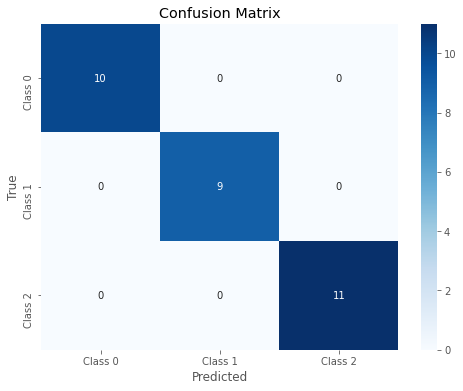

In [249]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, predictions)

# Plotting the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## 2. Decision tree

In [276]:
# Create an instance of DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
dt = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [290]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Generate predictions on the test set
precision_dt = precision_score(y_test, y_pred, average='weighted')  
recall_dt = recall_score(y_test, y_pred, average='weighted') 
accuracy_dt = accuracy_score(y_test, y_pred)

print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("Accuracy:", accuracy_dt)


Precision: 0.9700000000000001
Recall: 0.9666666666666667
Accuracy: 0.9666666666666667


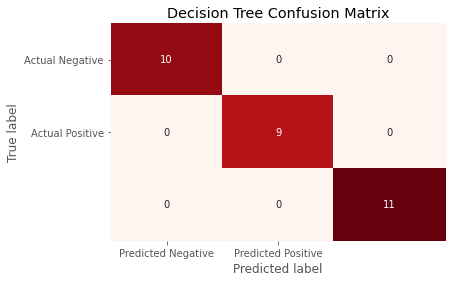

In [278]:
# Generate predictions on the test set
y_pred_dt = dt.predict(X_test)

# Build confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Visualize the Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dt, annot=True, cmap='Reds', fmt='g', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Decision Tree Confusion Matrix')
plt.show()

## 3.Random forest model

In [280]:
#Initializing the Random Forest model

rf_model = RandomForestClassifier(random_state=42)
#Train the Random Forest model on the training data

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [281]:
#Generate predictions on the test data

y_pred_rf = rf_model.predict(X_test)

In [291]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Precision (Adjust for multiclass classification)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')  # Or 'micro', 'weighted'

# Recall (Adjust for multiclass classification)
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')  # Or 'micro', 'weighted'

# F1-score (Adjust for multiclass classification)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')  # Or 'micro', 'weighted'

# ROC AUC Score for Random Forest (requires predicted probabilities)
y_pred_prob_rf = rf_model.predict_proba(X_test)  # Get predicted probabilities
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf, multi_class='ovr')  # 'ovr' for multiclass

# Print the performance metrics
print("Random Forest Metrics:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)
print("ROC AUC Score:", roc_auc_rf)


Random Forest Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC AUC Score: 1.0


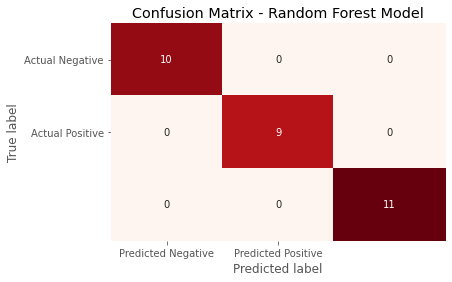

In [298]:
# Confusion matrix for Random Forest model
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Visualize the matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, cmap='Reds', fmt='g', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Random Forest Model')
plt.show()

In [307]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)  # Initialize Random Forest
rf.fit(X_train, y_train)  # Train the model


RandomForestClassifier(random_state=42)

## plot a ROC curve to compare performance of the models

Text(0.5, 1.0, 'Receiver Opera')

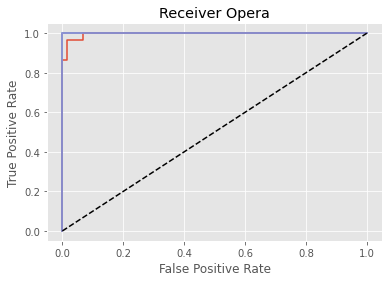

In [311]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Binarize the labels for multiclass classification
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Assuming 3 classes, update for your case

# Logistic Regression
logreg_probs = logreg.predict_proba(X_test)
logreg_fpr, logreg_tpr, _ = roc_curve(y_test_bin.ravel(), logreg_probs.ravel())  # Flatten arrays

# Random Forest
rf_probs = rf.predict_proba(X_test)
rf_fpr, rf_tpr, _ = roc_curve(y_test_bin.ravel(), rf_probs.ravel())

# Decision Tree
dt_probs = dt.predict_proba(X_test)
dt_fpr, dt_tpr, _ = roc_curve(y_test_bin.ravel(), dt_probs.ravel())

# Plotting the ROC curves for each class
plt.plot(logreg_fpr, logreg_tpr, label='Logistic Regression')
plt.plot(rf_fpr, rf_tpr, label='Random Forest')
plt.plot(dt_fpr, dt_tpr, label='Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Opera')


## Conclusion

The Random Forest model outperforms Logistic Regression and decision tree on all metrics, achieving perfect scores (1.0) for accuracy, precision, recall, F1-score, and ROC AUC.

# Recommendations

1.Introduce loyalty programs that reward long-term customers with benefits such as free upgrades, exclusive services, or special discounts.

2.Customers with frequent customer service calls may indicate unresolved issues. Streamline complaint resolution processes to address their concerns promptly.

3.Design personalized offers such as discounts, loyalty rewards, or improved service plans to retain these customers